# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score

# Load data

In [2]:
# Read data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Shuffle the entire data set (applies to both train & test)
df = df.sample(frac=1).reset_index(drop=True)
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [5]:
print(x[:3])

[[ 1.29238000e+05 -1.72900916e+00  1.54577371e+00 -1.55904756e+00
  -4.68547191e-01  6.90220696e-01 -9.37532588e-01  1.42542518e+00
  -4.72525218e-01  1.07964655e+00  1.05209706e+00 -7.21706071e-01
   1.21001202e-01  1.34082138e+00 -1.72014687e+00  8.03159160e-01
   7.23708012e-02 -5.15650139e-02  6.35674492e-01  5.34461411e-03
   2.51638478e-01 -1.42677208e-01  1.01577661e+00 -1.40244941e-01
  -6.81823472e-01  5.72008555e-03 -1.95072211e-01 -1.98216255e-01
  -5.64002736e-01  8.49500000e+01]
 [ 1.61379000e+05  2.05946298e+00  5.64049655e-01 -2.35834631e+00
   1.45734465e+00  1.03761584e+00 -9.87555947e-01  6.79705298e-01
  -3.55059986e-01  1.24168604e-01 -3.51692794e-01 -6.81927352e-01
  -6.42619018e-03 -1.97047970e-01 -1.02256934e+00 -3.72303751e-01
  -1.41817724e-01  9.02945087e-01  1.47141942e-01 -3.16908056e-01
  -2.25573434e-01 -5.51987741e-02  6.16025649e-02 -5.89952811e-03
   5.40487474e-01  5.15182863e-01 -5.20206751e-01 -2.76309281e-03
  -2.37167568e-02  1.00000000e+00]
 [ 8.4

In [6]:
print(y[:3])

[0 0 0]


# Finding the best k for KNN

In [7]:
def optimalK():
    Ks = 10
    mean_acc = np.zeros((Ks - 1))
    for n in range(1, Ks):
        # Train Model and Predict
        neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
        y_pred = neigh.predict(x_test)
        mean_acc[n - 1] = roc_auc_score(y_test, y_pred)
    print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
    return mean_acc.argmax()+1

# Creating train and test data

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler

# creating scaler object for encoding
scaler = StandardScaler()
# applying StandardScaler on x_train and x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
metric = np.array([['Precision-Recall AUC','Receiver Operating Characteristic(ROC) AUC','F1-score'],['','',''],['','',''],['','','']])

# Logistic Regression

In [16]:
classifier = LogisticRegression(C=0.1, solver='saga',max_iter=3000,random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
metric[0,:] = np.array([['{:.2%}'.format(auc(recall, precision)),'{:.2%}'.format(roc_auc_score(y_test, y_pred)),
                            '{:.2%}'.format(f1_score(y_test, y_pred))]])

# Decision Tree

In [12]:
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=4, random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
metric[1,:] = np.array([['{:.2%}'.format(auc(recall, precision)),'{:.2%}'.format(roc_auc_score(y_test, y_pred)),
                            '{:.2%}'.format(f1_score(y_test, y_pred))]])

# SVM Regression

In [13]:
classifier = SVC(kernel='rbf')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
metric[2,:] = np.array([['{:.2%}'.format(auc(recall, precision)),'{:.2%}'.format(roc_auc_score(y_test, y_pred)),
                            '{:.2%}'.format(f1_score(y_test, y_pred))]])

# KNN

In [14]:
classifier = KNeighborsClassifier(n_neighbors=optimalK())
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
metric[3,:] = np.array([['{:.2%}'.format(auc(recall, precision)),'{:.2%}'.format(roc_auc_score(y_test, y_pred)),
                            '{:.2%}'.format(f1_score(y_test, y_pred))]])

The best accuracy was with 0.886991268557789 with k= 1


# Accuracy 

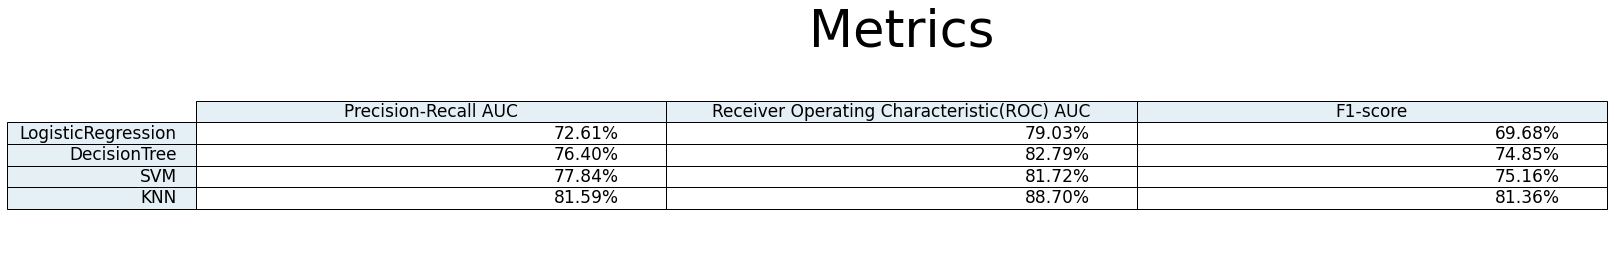

In [36]:
# plot metric
fig, ax = plt.subplots(figsize=(14,4)) 
columns = ('Precision-Recall AUC','Receiver Operating Characteristic(ROC) AUC','F1-score')
rows = ('LogisticRegression', 'DecisionTree', 'SVM','KNN')
rcolors = plt.cm.BuPu(np.full(len(rows), 0.1))
ccolors = plt.cm.BuPu(np.full(len(columns), 0.1))
table = plt.table(cellText=metric,rowLabels=rows,rowColours=rcolors,rowLoc='right',colColours=ccolors,colLabels=columns,loc='center',figure=fig)
table.set_fontsize(31)
table.scale(2, 2)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.box(on=None)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Metrics',fontdict={'fontsize': 51})
plt.show()
